# ADA, Homework: A Cheating Scandal at St. Bob University 🎓 (WITH ANSWERS)

---

By the end of this homework, we expect you to be able to:
- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Create meaningful visualizations to analyze the data;
- Communicate your findings in a clear and concise manner

**Important Dates.**
- Homework release: Wed 05 Nov, 2025
- Homework due: Wed 26 Nov, 2025, 23:59 (CET)

**Some rules**
- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
- Make sure you use the data folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
- Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.
- For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).
- Back up any hypotheses and claims with data, since this is an important aspect of the course.
- Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. If there are multiple notebooks present, we will not grade anything.
- We will not run your notebook for you! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a fully-run and evaluated notebook. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.  
- In this homework, we have a task that asks to do clustering. Clustering algorithms will be covered in the lecture on unsupervised learning on Nov 12, 2025.


**A Note on using Language Models (LMs)**
If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:

Presumably, you are taking this course to learn something! LMs are not always right (they often fail in silly ways). This course should prepare you to detect when they are wrong!
Some of the TAs on this course literally published many works on detecting machine-generated text.

---
## Story:

In the sleepy university town of Bobwest, a scandal is rocking the community. St. Bob, a well-respected university known for its demanding curriculum, is facing allegations of widespread cheating since the introduction of ChatGPT! The basis of the allegations? A recent audit has found a significant year-over-year jump in the graduating class's grade point averages.

Eager to restore their reputation and facing immense public scrutiny, St. Bob’s dean of students, Ms. Sakota, has contacted EPFL’s renowned ADA staff to perform a rigorous analysis. The goal is to:

- Determine if the jump in GPAs is likely due to cheating. 🧐
- If so, identify the culprits. 🕵️
- Propose ways to prevent it from happening in the future. 💡

Ms. Sakota has commissioned the university’s IT team to prepare a number of files to aid in the analysis. Unfortunately, the university’s systems have undergone many changes over the years. She thus warns the ADA staff to send their best and brightest representatives.

### Files for this assignment
This assignment is divided into four tasks tasks, each of which should bring you a step closer to providing a recommendation to Ms. Sakota:

- **Task 1**: Preparing data the right way
- **Task 2**: Inspecting the data using statistical tests
- **Task 3**: Analyzing the problem through causal analysis
- **Task 4**: Catching cheaters!

```bash
📁 
│
├── 📄 2025_HW2.ipynb (the file you're currently reading!)
│
└── 📁 data
    ├── 📄 grades_dataset.csv
    └── 📄 grades_dataset_causal.csv
```


In [1]:
# imports
import random
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Fix random seeds
np.random.seed(42)
random.seed(42)

## Task 1 (15 pts): Exploratory Data Analysis (EDA)
Oh no! It looks like not all data made it out in one piece... Before you're able
to do a proper analysis, you have to understand what type of data you are 
dealing with. This section is about learning to clean and understand your data.

In [2]:
df = pd.read_csv("data/grades_dataset.csv")

print(df.shape)
df.head()

(63568, 6)


,student_id,semester,year,class_id,grade,exam_type
0,5,Fall,2018,C0000,2.9,take-home
1,5,Fall,2018,C0000,2.2,take-home
2,7,Fall,2018,C0000,4.3,take-home
3,7,Fall,2018,C0000,3.3,take-home
4,9,Fall,2018,C0000,5.0,take-home


### Question 1.0 (6 pts)

**1.0.1 (3 pts)**: How many unique students are enrolling on average each year? Print year-wise counts.  
*Hint: students enroll in the Fall*

In [9]:
### YOUR CODE BELOW (THE **OUTPUT** OF THIS CELL WILL BE USED FOR EVALUATION) ###

existing_student_ids = []
for year in df['year'].unique():
    all_ids = df[df['year'] == year]['student_id'].unique().tolist()
    new_ids = [i for i in all_ids if i not in existing_student_ids]
    existing_student_ids.extend(new_ids)
    print(f"Year {year}: {len(new_ids)} new students")

Year 2018: 298 new students
Year 2019: 313 new students
Year 2020: 315 new students
Year 2021: 315 new students
Year 2022: 295 new students
Year 2023: 304 new students
Year 2024: 297 new students


**1.0.2 (2 pts)**: How long does this degree program generally take to complete? (Round up to years)

In [10]:
### YOUR CODE BELOW (THE **OUTPUT** OF THIS CELL WILL BE USED FOR EVALUATION) ###
avg_years_enrolled = df.groupby('student_id')[['year']].nunique().mean().mean()
print(f'Average years enrolled: {np.ceil(avg_years_enrolled)}')

Average years enrolled: 2.0


**1.0.3 (1 pts)**: How many classes does this program offer?

In [5]:
### YOUR CODE BELOW (THE **OUTPUT** OF THIS CELL WILL BE USED FOR EVALUATION) ###

num_classes = df['class_id'].nunique()
print(f'Number of unique classes offered: {num_classes}')

Number of unique classes offered: 20


### Question 1.1 (4 pts)  
Each student ID is supposed to be exactly 8 characters long. Inspect the data and solve the following tasks.

**1.1.1 (2 pts)**: Write code to make sure that each student ID is 8 characters long. When you run the cell, it will output 10 random student IDs which you can use to verify your code is working properly. These outputs will be used for grading also.    

*As examples, the student ID 123 should be converted to 00000123, 1234 to 00001234, and so on.*

In [6]:
### YOUR CODE BELOW (THE **OUTPUT** OF THIS CELL WILL BE USED FOR EVALUATION) ###

def add_missing_zeros(student_id):
    return str(student_id).zfill(8)

df['student_id'] = df['student_id'].apply(add_missing_zeros)

### DO NOT MODIFY THE FOLLOWING LINES ###
# randomly sample and print 10 student IDs
for _ in range(10):
    print(df['student_id'].sample(1).values[0])

00001036
00001044
00000497
00001789
00000253
00000467
00001351
00000864
00001344
00001304


**1.1.2. (2 pts)**: /Discuss/: what might have caused the issue?

In [7]:
### YOUR ANSWER (CREATE A NEW MARKDOWN CELL BELOW TO ANSWER) ###

**Answer**: This can happen if the student IDs are stored as integeres instead of strings. For example, student ID '00123' would be stored as 123, losing the leading zeros."

### Question 1.2 (5 pts)

**1.2.1a (2 pts)** Plot histogram of the grades distribution over time. (Note: You might need to convert the `grade` column to numeric type first. You can use `pd.to_numeric()` with `errors='coerce'`)

(array([2.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.3186e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.8000e+01]),
 array([-1000000.,  -900000.,  -800000.,  -700000.,  -600000.,  -500000.,
         -400000.,  -300000.,  -200000.,  -100000.,        0.,   100000.,
          200000.,   300000.,   400000.,   500000.,   600000.,   700000.,
          800000.,   900000.,  1000000.]),
 <BarContainer object of 20 artists>)

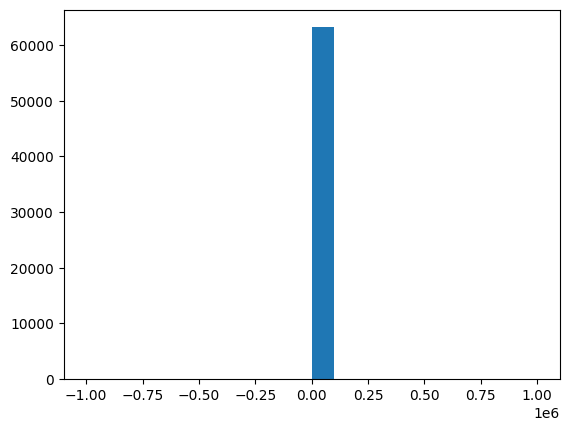

In [ ]:
### YOUR CODE BELOW (THE **OUTPUT** OF THIS CELL WILL BE USED FOR EVALUATION) ###
df['grade'] = pd.to_numeric(df['grade'], errors='coerce')
plt.hist(df['grade'], bins=20)

**1.2.1b (1 pts)** /Discuss/: Do you notice anything?

In [9]:
### YOUR ANSWER (CREATE A NEW MARKDOWN CELL BELOW TO ANSWER) ###

**Answer**: Some of the grades are extreme values, i.e., they are likely corrupted!

**1.2.2 (2 pts)**: Please make sure the grades are between 1 and 10 and try again. Note: Any grades that are **not** in this range should be dropped.

In [10]:
### YOUR CODE BELOW (THE **OUTPUT** OF THIS CELL WILL BE USED FOR EVALUATION) ###

def convert_grade(x):
    try:
        x_ = float(x)
        if 1 <= x_ <= 10:
            return x_
        else:
            return np.nan
    except:
        return np.nan


df['grade'] = df['grade'].apply(convert_grade)
df = df.dropna(subset=['grade'])

### DO NOT MODIFY THE FOLLOWING LINES ###
# print the maximum and minimum grade after grade range conversion
print(df['grade'].max(), df['grade'].min())

10.0 1.0


## Task 2 (30 pts): Statistical Analysis

### Question 2.1 (6 pts)
Let's take a look at the grades over time. For this,
1. plot the average grades for each year/semester with 95% "standard error" confidence intervals (CI)
2. in the same figure, plot the average take-home and in-person grades with 95% CI


**More details about the plot**:

- The output should be a single plot with three colors (one each for "All", "Take-Home", and "In-Person" grades).  
- The plot should have 14 points on x-axis (or xticks), i.e., 7 years (2018-2024) and 2 semesters (Fall, Spring) per year in chronological order (e.g., `2018Fall`, `2018Spring`, `2019Fall`, ..., `2024Spring`).   
- The y-axis should represent the average grades for each semester.   
- You must also include error bars (it is recommended to use `plt.errorbar()` and `plt.fill_between()` functions) representing the 95% confidence intervals for the average grades.   
- Finally, in the figure, it is recommended that the x-axis label, y-axis label, and the title should be `Year and Semester`, `Average Grade` and `Average Grades Over Time by Exam Type`, respectively.

14 14 14


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '2018Fall'),
  Text(1, 0, '2018Spring'),
  Text(2, 0, '2019Fall'),
  Text(3, 0, '2019Spring'),
  Text(4, 0, '2020Fall'),
  Text(5, 0, '2020Spring'),
  Text(6, 0, '2021Fall'),
  Text(7, 0, '2021Spring'),
  Text(8, 0, '2022Fall'),
  Text(9, 0, '2022Spring'),
  Text(10, 0, '2023Fall'),
  Text(11, 0, '2023Spring'),
  Text(12, 0, '2024Fall'),
  Text(13, 0, '2024Spring')])

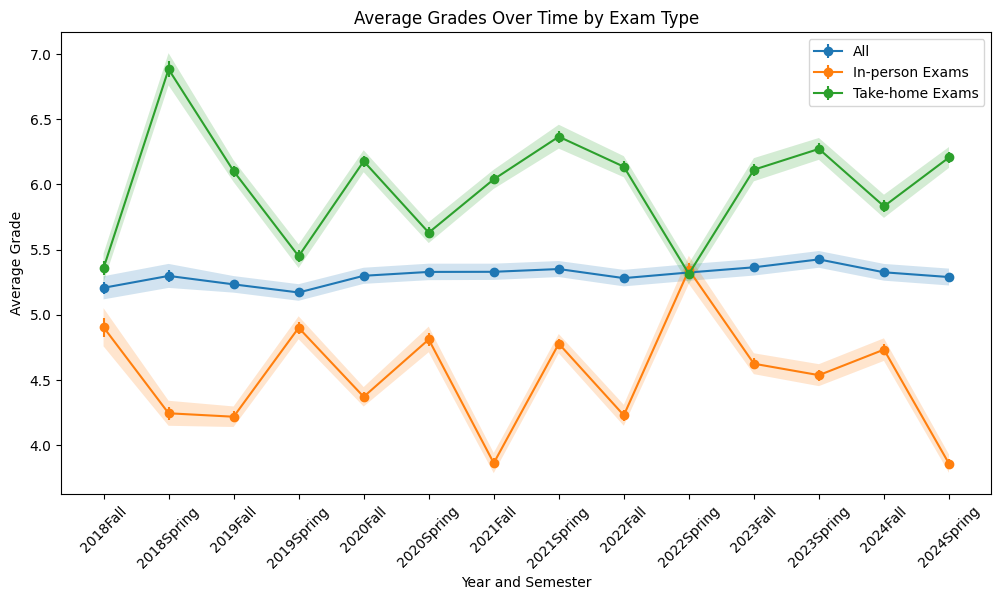

In [11]:
### YOUR CODE BELOW (THE **OUTPUT** OF THIS CELL WILL BE USED FOR EVALUATION) ###

all_grades = df.groupby(['year', 'semester', 'exam_type'])['grade'].agg(['mean', 'sem']).reset_index()
take_home_grades = all_grades[all_grades['exam_type'] == 'take-home']
in_person_grades = all_grades[all_grades['exam_type'] == 'in-person']

all_grades = df.groupby(['year', 'semester'])['grade'].agg(['mean', 'sem']).reset_index()
print(len(all_grades), len(take_home_grades), len(in_person_grades))

plt.figure(figsize=(12, 6))

for data, label in zip(
    [all_grades, in_person_grades, take_home_grades],
    ['All', 'In-person Exams', 'Take-home Exams']
):
    plt.errorbar(data['year'].astype(str) + (data['semester']),
                 data['mean'], yerr=data['sem'], fmt='o-', label=label)
    plt.fill_between(data['year'].astype(str) + (data['semester']),
                     data['mean'] - data['sem']*1.96,
                     data['mean'] + data['sem']*1.96, alpha=0.2)
plt.legend()
plt.xlabel('Year and Semester')
plt.ylabel('Average Grade')
plt.title('Average Grades Over Time by Exam Type')
plt.xticks(rotation=45)

### Question 2.2 (6 pts)

The plots from the previous question suggest that grades for take-home exams are consistently higher than for in-person exams. This observation is the cornerstone of the cheating allegation.

**2.2.1 (4 pts)**: Perform an appropriate statistical test to determine if the overall difference in mean grades between take-home and in-person exams is statistically significant.

In [12]:
### YOUR CODE BELOW (THE **OUTPUT** OF THIS CELL WILL BE USED FOR EVALUATION) ###
# compute p-value from t-test which will be used in the interpretation section below

df['grade'] = pd.to_numeric(df['grade'], errors='coerce')
df.dropna(subset=['grade'], inplace=True)

take_home_grades = df[df['exam_type'] == 'take-home']['grade']
in_person_grades = df[df['exam_type'] == 'in-person']['grade']

# Perform Welch's t-test
t_stat, p_value = sp.stats.ttest_ind(
    take_home_grades,
    in_person_grades,
    equal_var=False,  # This performs Welch's t-test
    nan_policy='omit'
)

print(f"Welch's t-test results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value}")

### DO NOT MODIFY THE FOLLOWING LINES ###
# Interpretation
# we assume there the variable p_value from the t-test is defined above
alpha = 0.05
if p_value < alpha:
    print(f"\nThe p-value is less than {alpha}, so we reject the null hypothesis.")
    print("There is a statistically significant difference in grades between take-home and in-person exams.")
else:
    print(f"\nThe p-value is greater than {alpha}, so we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in grades between take-home and in-person exams.")

Welch's t-test results:
T-statistic: 83.2535
P-value: 0.0

The p-value is less than 0.05, so we reject the null hypothesis.
There is a statistically significant difference in grades between take-home and in-person exams.


**2.2.2 (1 pts)**: /Discuss/: Justify your choice of test.

In [13]:
### YOUR ANSWER (CREATE A NEW MARKDOWN CELL BELOW TO ANSWER) ###

**Answer**:
- We want to compare the average performance of two groups. 
- We choose Welch's t-test because we cannot assume that the two groups
(take-home and in-person) have equal variance.
- It is more robust than Student's t-test.

**2.2.3 (1 pts)**: /Discuss/: Based on the result, what would be your preliminary conclusion to Ms. Sakota?

In [14]:
### YOUR ANSWER (CREATE A NEW MARKDOWN CELL BELOW TO ANSWER) ###

**Answer**:
- The difference between the two types of exams is statistically significant at C.I. = 95%
- Based on this result alone, one could conclude that there is cheating involved!

### Question 2.3 (8 pts)
A senior professor suggests that the university's admission standards have been getting tougher, leading to a stronger student body over the years. This could be a confounding factor. Let's rigorously test the theory that the student body's academic performance has been changing year-over-year. We can use clustering to identify performance groups for each year and track their proportions over time.

1. Create a feature set by calculating the average grade for each student for each year they were enrolled.

2. Using this yearly performance data, apply the k-means clustering algorithm with k=3 to group the student-year records.

3. Analyze the cluster centers to label the groups as 'Low', 'Medium', and 'High' performers for any given year. **Print out the cluster centers along with their corresponding (above) labels.**

4. **Create a stacked bar plot showing the proportion of students belonging to each performance tier for each year. Print out the proportions for each year as well.**

**Note**: It is recommended to have the plot title as `Student Performance Composition by Year`, x-axis label as `Year`, and y-axis label as `Proportion of Students`.

K-Means Cluster Centers (Yearly Average Grade):
- Low Tier: 4.21
- Medium Tier: 5.42
- High Tier: 6.63
K-Means Cluster Centers (Yearly Average Grade):
- Low Tier: 4.21
- Medium Tier: 5.42
- High Tier: 6.63


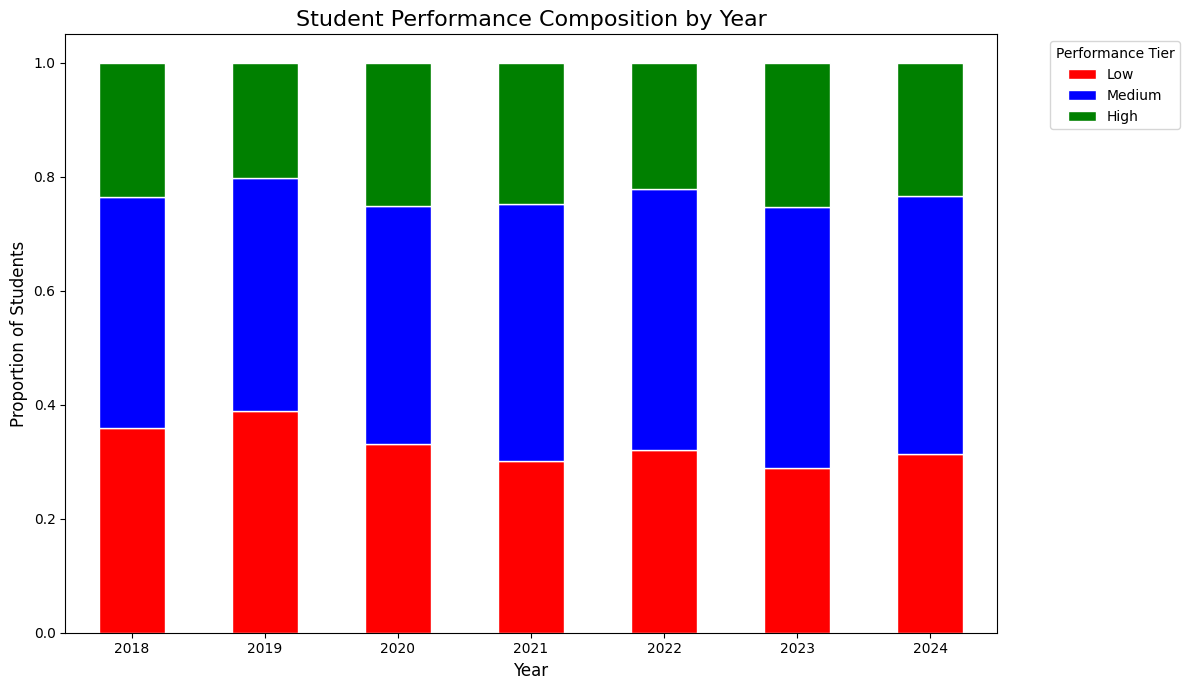


Yearly Proportions:
tier      High       Low    Medium
year                              
2018  0.234899  0.359060  0.406040
2019  0.201309  0.389525  0.409165
2020  0.251592  0.331210  0.417197
2021  0.247619  0.301587  0.450794
2022  0.221311  0.321311  0.457377
2023  0.253756  0.288815  0.457429
2024  0.232945  0.314476  0.452579


In [15]:
from sklearn.cluster import KMeans

### (THE **OUTPUT** OF THIS CELL WILL BE USED FOR EVALUATION) ###

# Subtask 1. Create features: average grade per student, per year
# Create a feature set by calculating the average grade for each student for each year they were enrolled.

student_yearly_performance = df.groupby(['student_id', 'year'])['grade'].mean().reset_index()
student_yearly_performance.rename(columns={'grade': 'avg_grade_year'}, inplace=True)

### YOUR CODE BELOW ###

# Subtask 2. Use k-means on the yearly average grade
# Using this yearly performance data, apply the k-means clustering algorithm with k=3 to group the student-year records.

# Prepare data for KMeans (it needs a 2D array)
kmeans_data = student_yearly_performance[['avg_grade_year']].values

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
student_yearly_performance['cluster'] = kmeans.fit_predict(kmeans_data)

### YOUR CODE BELOW ###

cluster_centers = kmeans.cluster_centers_
# Sort centers to assign labels correctly (low, medium, high)
sorted_centers = sorted([(center[0], i) for i, center in enumerate(cluster_centers)])

tier_map = {
    sorted_centers[0][1]: 'Low',
    sorted_centers[1][1]: 'Medium',
    sorted_centers[2][1]: 'High'
}
student_yearly_performance['tier'] = student_yearly_performance['cluster'].map(tier_map)

print("K-Means Cluster Centers (Yearly Average Grade):")
for label, (center, i) in zip(['Low', 'Medium', 'High'], sorted_centers):
    print(f"- {label} Tier: {center:.2f}")

# Subtask 3. Analyze and label the clusters
# Analyze the cluster centers to label the groups as 'Low', 'Medium', and 'High' performers for any given year.
# Print out the cluster centers along with their corresponding (above) labels.

### YOUR CODE BELOW ###

cluster_centers = kmeans.cluster_centers_
# Sort centers to assign labels correctly (low, medium, high)
sorted_centers = sorted([(center[0], i) for i, center in enumerate(cluster_centers)])

tier_map = {
    sorted_centers[0][1]: 'Low',
    sorted_centers[1][1]: 'Medium',
    sorted_centers[2][1]: 'High'
}
student_yearly_performance['tier'] = student_yearly_performance['cluster'].map(tier_map)

print("K-Means Cluster Centers (Yearly Average Grade):")
for label, (center, i) in zip(['Low', 'Medium', 'High'], sorted_centers):
    print(f"- {label} Tier: {center:.2f}")

# Subtask 4. Calculate proportions and create the stacked bar plot
# Create a stacked bar plot showing the proportion of students belonging to each performance tier for each year.
# Print out the proportions for each year as well.

### YOUR CODE BELOW ###

yearly_composition = (
    student_yearly_performance.groupby(['year', 'tier'])
    .size()
    .unstack(fill_value=0)
)

# Convert counts to proportions
yearly_proportions = yearly_composition.div(yearly_composition.sum(axis=1), axis=0)

# Plotting
yearly_proportions[['Low', 'Medium', 'High']].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    color=['red', 'blue', 'green'],
    edgecolor='white'
)

plt.title('Student Performance Composition by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Proportion of Students', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Performance Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nYearly Proportions:")
print(yearly_proportions)

### Question 2.4 (5 pts)
The stacked bar plot from the previous question should suggest that the student body composition has been stable. While visual inspection is useful, a formal statistical test is more rigorous. Let's confirm if any apparent year-to-year change is statistically significant or likely due to random chance.

1. Focusing on the data for the last two years, 2023 and 2024, create a contingency table of student counts for each performance tier ('Low', 'Medium', 'High').

2. State the null (H0) and alternative (H1) hypotheses (in the markdown after this code cell) for a Chi-squared test of homogeneity on this data.

3. Perform the Chi-squared test. Report the Chi-squared statistic, the degrees of freedom, and the p-value.

4. Based on a significance level of α=0.05, what is your final conclusion?

**2.4.1 (4 pts)**: Code completion with conclusion about student body composition.

In [16]:
from scipy.stats import chi2_contingency

### (THE **OUTPUT** OF THIS CELL WILL BE USED FOR EVALUATION) ###

# 1. Filter for the last two years and create a contingency table
# Focusing on the data for the last two years, 2023 and 2024, create a contingency table of student counts for each performance tier ('Low', 'Medium', 'High').

### YOUR CODE BELOW ###

recent_years_data = student_yearly_performance[student_yearly_performance['year'].isin([2023, 2024])]
contingency_table = pd.crosstab(recent_years_data['year'], recent_years_data['tier'])

# Ensure the columns are in a logical order
contingency_table = contingency_table[['Low', 'Medium', 'High']]

print("Contingency Table (Observed Counts):")
print(contingency_table)

# 3. Perform the Chi-squared test
# Perform the Chi-squared test. Report the Chi-squared statistic, the degrees of freedom, and the p-value.

### YOUR CODE BELOW ###

chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

print("\n--- Chi-Squared Test Results ---")
print(f"Chi-squared Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_value:.4f}")

# 4. State the conclusion
# Based on a significance level of α=0.05, what is your final conclusion?
### YOUR CODE BELOW ###

alpha = 0.05
print("\n--- Conclusion ---")
if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than {alpha}, we reject the null hypothesis.")
    print("There is a statistically significant change in the student composition between 2023 and 2024.")
else:
    print(f"Since the p-value ({p_value:.4f}) is greater than {alpha}, we fail to reject the null hypothesis.")
    print("There is no statistically significant change in the student composition between 2023 and 2024.")

Contingency Table (Observed Counts):
tier  Low  Medium  High
year                   
2023  173     274   152
2024  189     272   140

--- Chi-Squared Test Results ---
Chi-squared Statistic: 1.2043
Degrees of Freedom: 2
P-value: 0.5476

--- Conclusion ---
Since the p-value (0.5476) is greater than 0.05, we fail to reject the null hypothesis.
There is no statistically significant change in the student composition between 2023 and 2024.


**2.4.2 (1 pts)**: /Discuss/: State Hypotheses H0 and H1 you used for the Chi-squared test.

In [17]:
### YOUR ANSWER (CREATE A NEW MARKDOWN CELL BELOW TO ANSWER) ###

**Answer**:
- **H0**: The distribution of student performance tiers is the same for 2023 and 2024.  
- **H1**: The distribution of student performance tiers is different for 2023 and 2024.

### Question 2.5 (5 pts)

The analysis so far has looked at the changing student body as the primary explanation for the grade trends.
An alternative hypothesis is that the issue isn't the exam format itself, but the classes that use them. A reasonable way to define a class's difficulty is by the average grade it awards.

**2.5.1 (1 pts)**: Calculate the overall average grade for each unique class_id. Additionally, sort the class_id based on their average grades in ascending (increasing) order and print them which will be used for grading.

In [18]:
### YOUR CODE BELOW (THE **OUTPUT** OF THIS CELL WILL BE USED FOR EVALUATION) ###

class_avg_grades = df.groupby('class_id')['grade'].mean().sort_values()

### DO NOT MODIFY THE FOLLOWING LINES ###
print(class_avg_grades.index.values)

['C0005' 'C0007' 'C0013' 'C0003' 'C0000' 'C0018' 'C0011' 'C0016' 'C0006'
 'C0002' 'C0012' 'C0019' 'C0008' 'C0014' 'C0015' 'C0004' 'C0010' 'C0001'
 'C0017' 'C0009']


**2.5.2 (2 pts)**: Create a histogram of these average class grades to visualize the distribution of class difficulties.

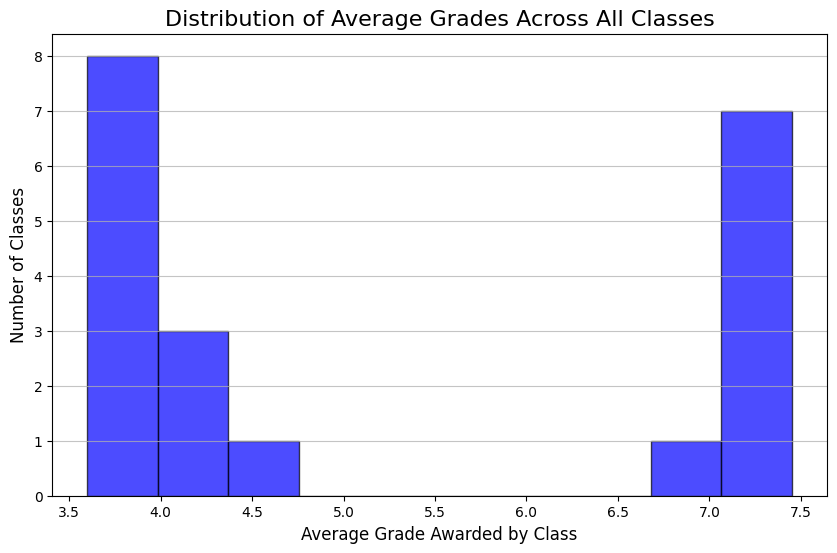

In [19]:
### YOUR CODE BELOW (THE **OUTPUT** OF THIS CELL WILL BE USED FOR EVALUATION) ###

plt.figure(figsize=(10, 6))
plt.hist(class_avg_grades, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Average Grades Across All Classes', fontsize=16)
plt.xlabel('Average Grade Awarded by Class', fontsize=12)
plt.ylabel('Number of Classes', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

**2.5.3a (1 pts)**: Based on your analysis, identify the top 5 "easiest" (highest average grade) and top 5 "hardest" (lowest average grade) classes.

In [20]:
### YOUR CODE BELOW (THE **OUTPUT** OF THIS CELL WILL BE USED FOR EVALUATION) ###

easiest_classes = class_avg_grades.tail(5)
hardest_classes = class_avg_grades.head(5)

print("--- Top 5 Easiest Classes (by highest average grade) ---")
print(easiest_classes)
print("\n--- Top 5 Hardest Classes (by lowest average grade) ---")
print(hardest_classes)

--- Top 5 Easiest Classes (by highest average grade) ---
class_id
C0004    7.304832
C0010    7.338963
C0001    7.389775
C0017    7.441622
C0009    7.451026
Name: grade, dtype: float64

--- Top 5 Hardest Classes (by lowest average grade) ---
class_id
C0005    3.599731
C0007    3.660525
C0013    3.663899
C0003    3.748633
C0000    3.811896
Name: grade, dtype: float64


**2.5.3b (1 pts)**: /Discuss/: What does the distribution tell you about the curriculum at St. Bob?

In [21]:
### YOUR ANSWER BELOW (CREATE A NEW MARKDOWN CELL BELOW TO ANSWER) ###

**Answer**:
- The classes at St. Bob appear to follow a strongly bi-modal distribution when it comes to difficulty.
- That is: one group of classes is very "easy", while another group of classes is very "hard."

## Task 3 (30 pts): Causal Analysis

In [22]:
df_causal = pd.read_csv("data/grades_dataset_causal.csv")

### Question 3.1 (6 pts)

Our statistical analysis has revealed a complex web of relationships. A simple t-test is not enough to determine causation. To reason about this properly, we need to build a causal model.

**3.1.1 (2 pts)**: Draw a Directed Acyclic Graph (DAG) that illustrates the plausible causal relationships between the following four variables:

- Student Ability (a student's intrinsic academic skill)
- Class Difficulty (how easy or hard a class is)
- Exam Type (in-person or take-home)
- Grade (the final outcome)

In [23]:
### YOUR ANSWER (CREATE A NEW MARKDOWN CELL BELOW TO ANSWER) ###
### YOU CAN ALSO USE PYTHON PACKAGES AND CODE TO ANSWER THIS ###

**Answer**: Directed Acyclic Graph (DAG)  

The causal relationships can be represented with the following directed edges:

- Student Ability -> Grade
- Student Ability -> Class Difficulty
- Class Difficulty -> Grade
- Class Difficulty -> Exam Type
- Exam Type -> Grade

**3.1.2 (2 pts)**: /Discuss/: For each arrow (directed edge) in your graph, write a one-sentence justification for its existence and direction. For example, "An arrow from Student Ability to Grade represents that a student's ability directly affects the grade they receive."

In [24]:
### YOUR ANSWER (CREATE A NEW MARKDOWN CELL BELOW TO ANSWER) ###

**Answer**: Justification for Each Edge
- Student Ability -> Grade: A student's academic skill directly influences their performance and the grade they receive.
- Student Ability -> Class Difficulty: Students tend to self-select into classes based on their ability, with higher-ability students often choosing more challenging courses.
- Class Difficulty -> Grade: The inherent difficulty of a class affects the average grade, with harder classes generally leading to lower grades.
- Class Difficulty -> Exam Type: The difficulty of a class often determines its assessment format; for example, introductory classes might be more likely to have take-home exams.
- Exam Type -> Grade: The format of an exam might directly impact a student's grade, which is the central hypothesis being investigated.

**3.1.3 (2 pts)**: /Discuss/: Based on your DAG, identify any confounding variables that might distort the simple relationship between Exam Type and Grade. Explain how your diagram illustrates this confounding.

In [25]:
### YOUR ANSWER (CREATE A NEW MARKDOWN CELL BELOW TO ANSWER) ###

**Answer**: Confounding Variables

Based on the DAG, both Student Ability and Class Difficulty are confounding variables.

- Class Difficulty is a confounder because it's a common cause of both the Exam Type and the Grade. An arrow points from Class Difficulty to Exam Type and from Class Difficulty to Grade. This creates a "back-door path" (Exam Type <- Class Difficulty -> Grade). If easier classes award higher grades and also tend to use take-home exams, it would create a misleading association between take-home exams and high grades.

- Student Ability is a confounder because it affects which classes a student takes (Student Ability -> Class Difficulty) and also directly affects their Grade (Student Ability -> Grade). This creates a second back-door path (Exam Type <- Class Difficulty <- Student Ability -> Grade). If high-ability students (who get higher grades) systematically choose classes that happen to have a certain exam format, the observed effect could be due to ability, not the exam type.

### Question 3.2 (5 pts)

Your DAG likely shows that a student's ability is a major confounder. We can control for this by comparing a student against themselves. A paired t-test is an excellent tool for this.

**3.2.1 (2 pts)**: 
1. Identify all students who have taken at least one of each exam type during their studies. 
2. For this subset of students, calculate each student's average grade on take-home exams and their average grade on in-person exams. 

Since for the paired t-test we require students who have an average grade for BOTH exam types, your task is to **print the number of students who have taken both exam types**, which will be used for grading.

In [26]:
### YOUR CODE BELOW (THE **OUTPUT** OF THIS CELL WILL BE USED FOR EVALUATION) ###
# At the end, print the number of students who have taken both exam types

student_pivot = df_causal.pivot_table(
    index='student_id',
    columns='exam_type',
    values='grade',
    aggfunc='mean'
)

# Keep only students who have an average for BOTH exam types
paired_data = student_pivot.dropna(subset=['take-home', 'in-person'])

print(f"Found {len(paired_data)} students who have taken both exam types.")

Found 2448 students who have taken both exam types.


**3.2.2a (1 pts)**: Perform a paired t-test on these two sets of average grades and print the T-statistic and P-value. 

In [27]:
### YOUR CODE BELOW (THE **OUTPUT** OF THIS CELL WILL BE USED FOR EVALUATION) ###

take_home_grades = paired_data['take-home']
in_person_grades = paired_data['in-person']

paired_ttest_result = stats.ttest_rel(take_home_grades, in_person_grades)

print("\n--- Paired t-test Results ---")
print(f"T-statistic: {paired_ttest_result.statistic:.4f}")
print(f"P-value: {paired_ttest_result.pvalue:.4f}")


--- Paired t-test Results ---
T-statistic: 62.4170
P-value: 0.0000


**3.2.2b (2 pts)**: /Discuss/: State your null and alternative hypotheses. 

In [28]:
### YOUR ANSWER (CREATE A NEW MARKDOWN CELL BELOW TO ANSWER) ###

**Answer**:
- **H0**: When controlling for student ability, grades for take-home exams are similar to those of in-person exams
- **H1**: When controlling for student ability, grades for take-home exams are higher than those of in-person exams
  
_Note, alternatively: a student might use language like "easier/harder"_

### Question 3.3 (6 pts)

The paired t-test in the previous question was a great step, as it controlled for baseline differences in Student Ability by comparing each student to themselves. However, there's another potential confounding factor we haven't addressed: Class Difficulty. What if students tend to get take-home exams in easier classes? If so, the higher grades might be due to the class being easy, not the exam type.

**3.3.1 (5 pts)**:
To isolate the true effect of the exam type, we need to make our comparisons even fairer by controlling for both student ability (you can ignore the "Medium" performers, and consider "High" as High-ability students and "Low" for Low-ability students)  and class difficulty at the same time.

1. Using the `df_causal` dataset, group your data into four distinct categories based on student ability and class difficulty:

- High-ability students in Easy classes
- Low-ability students in Easy classes
- High-ability students in Hard classes
- Low-ability students in Hard classes

2. Create a 1x2 grid of subplots to compare these groups.

- The left subplot should show the data for Easy classes and the right for Hard classes.
- On the x-axis of each subplot, show the results for 'Low' and 'High' ability students.
- Use bars to represent the average grade for both 'in-person' and 'take-home' exams within each category.

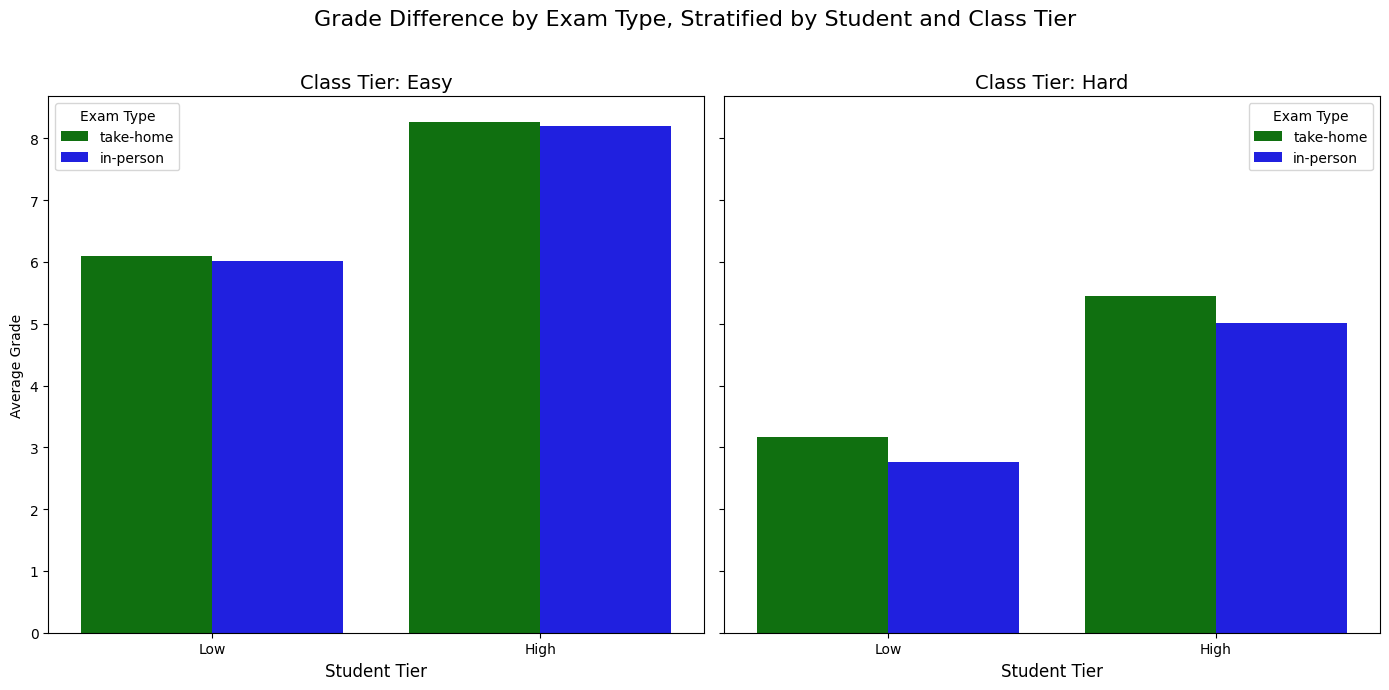

In [29]:
### YOUR CODE BELOW (THE **OUTPUT** OF THIS CELL WILL BE USED FOR EVALUATION) ###

# 1. Filter the data into the required strata
analysis_df = df_causal[
    df_causal['tier_kmeans'].isin(['Low', 'High']) &
    df_causal['difficulty_tier'].isin(['Easy', 'Hard'])
].copy()

# 2. Create a 1x2 grid of subplots using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)
fig.suptitle('Grade Difference by Exam Type, Stratified by Student and Class Tier', fontsize=16)

# Define the difficulty tiers for iterating through the subplots
difficulty_tiers = ['Easy', 'Hard']

for i, tier in enumerate(difficulty_tiers):
    ax = axes[i]
    # Filter data for the current difficulty tier
    tier_data = analysis_df[analysis_df['difficulty_tier'] == tier]
    
    # Create the bar plot on the specific subplot axis using seaborn's barplot
    sns.barplot(
        data=tier_data,
        x='tier_kmeans',
        y='grade',
        hue='exam_type',
        ax=ax,
        order=['Low', 'High'],
        palette={'in-person': 'blue', 'take-home': 'green'},
        errorbar=None # Hiding error bars for cleaner look, can be set to ('ci', 95)
    )
    
    ax.set_title(f'Class Tier: {tier}', fontsize=14)
    ax.set_xlabel('Student Tier', fontsize=12)
    ax.set_ylabel('Average Grade' if i == 0 else '') # Only label y-axis on the first plot
    ax.legend(title='Exam Type')

# Adjust layout to make room for the main title and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**3.3.2 (1 pts)** /Discuss/: Analyze your plot. After controlling for both factors, what is the difference in average grades between exam types within each of the four subgroups?

In [30]:
### YOUR ANSWER (CREATE A NEW MARKDOWN CELL BELOW TO ANSWER) ###

**Answer**:
- After controlling for both factors, the grade differences between exam types for each subgroup are very small
- There is slightly more separation for the "harder" classes compared to the easier ones

### Question 3.4 (9 pts)

Another way to untangle these effects is to use a predictive model. A decision tree can show us which factors are most important for predicting a student's grade, which can help confirm our causal conclusion.

**3.4.1 (6 pts)**  

**3.4.1a**: Prepare your data: Create a dataset with Grade as the target variable. The features should be:

- A numerical feature for Student Ability (use each student's overall average grade).

- A numerical feature for Class Difficulty (use each class's overall average grade).

- A numerical feature for Exam Type (convert 'in-person' to 0 and 'take-home' to 1).

In [31]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

### YOUR CODE BELOW ###

# 1. Prepare the data
# Get student ability (overall average grade)
student_ability = df_causal.groupby('student_id')['grade'].mean().to_frame('student_ability')
# Get class difficulty (overall average grade)
class_difficulty = df_causal.groupby('class_id')['grade'].mean().to_frame('class_difficulty')

# Merge these features back into the main df
model_df = df_causal.merge(student_ability, on='student_id')
model_df = model_df.merge(class_difficulty, on='class_id')

# Convert exam_type to numeric
model_df['exam_type_numeric'] = model_df['exam_type'].apply(lambda x: 1 if x == 'take-home' else 0)

# Define features (X) and target (y)
features = ['student_ability', 'class_difficulty', 'exam_type_numeric']
target = 'grade'

X = model_df[features]
y = model_df[target]

**3.4.1b**: Train a DecisionTreeRegressor on this data. To keep the model easy to interpret, set the max_depth to 3. **Visualize the resulting tree** with `plot_tree`.

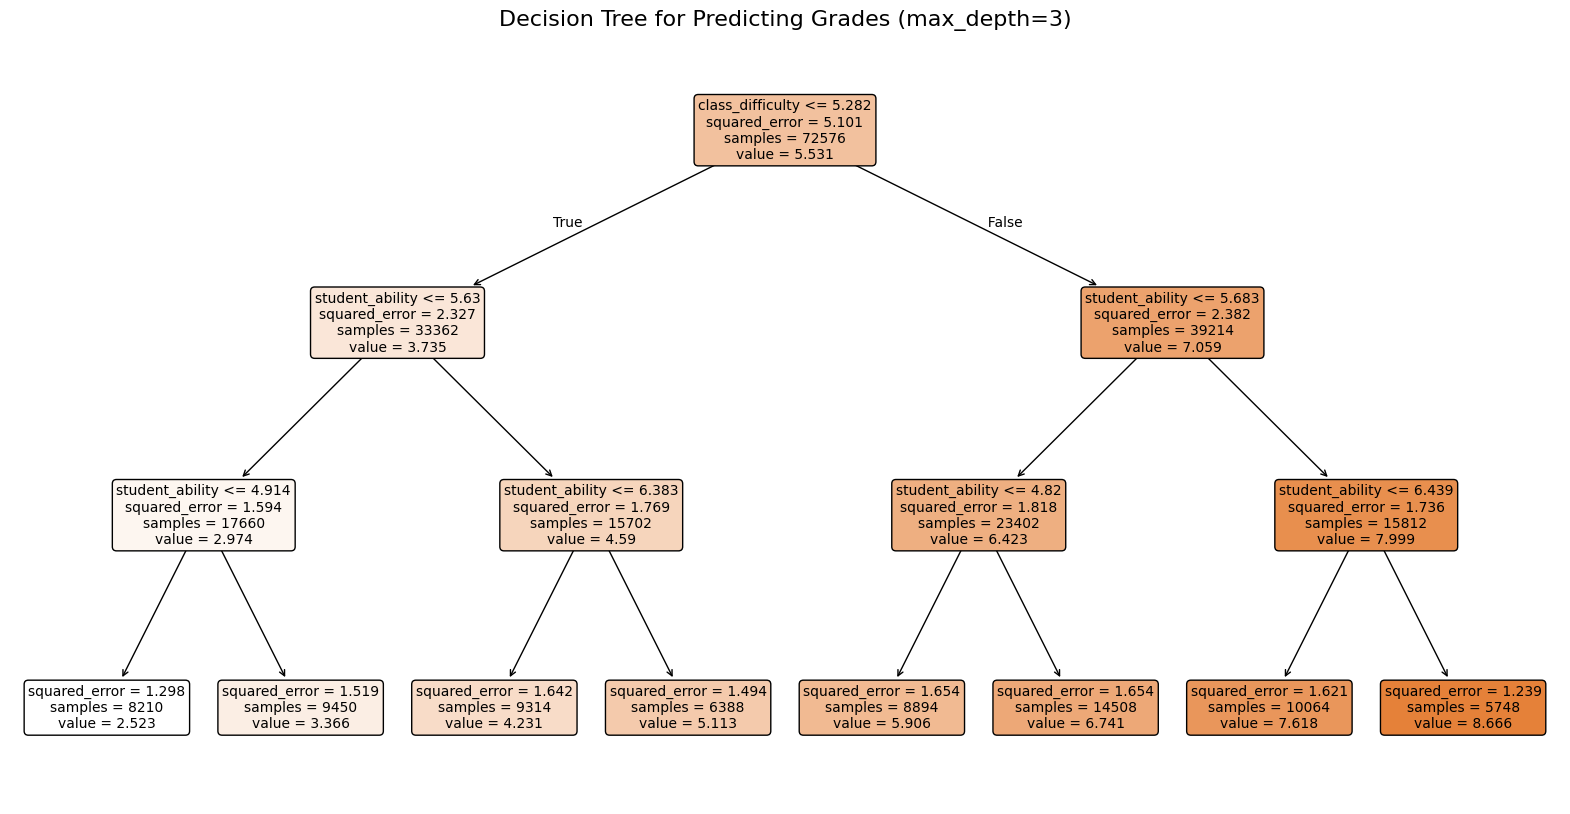

In [32]:
### YOUR CODE BELOW (THE **OUTPUT** OF THIS CELL WILL BE USED FOR EVALUATION) ###

# 2. Train and Visualize the Decision Tree
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X, y)

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=features, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Predicting Grades (max_depth=3)", fontsize=16)
plt.show()

**3.4.2 (1 pts)**: Print the `feature_importances_` of the trained model in ascending (increasing) order.

In [33]:
### YOUR CODE BELOW (THE **OUTPUT** OF THIS CELL WILL BE USED FOR EVALUATION) ###

importances = pd.Series(tree_model.feature_importances_, index=features)
print("\n--- Feature Importances ---")
print(importances.sort_values(ascending=False))


--- Feature Importances ---
class_difficulty     0.771294
student_ability      0.228706
exam_type_numeric    0.000000
dtype: float64


**3.4.3 (2 pts)**:
/Discuss:/ 
1. According to the model, which features are most important for predicting a grade? 
2. How does the importance of Exam Type compare to the others? 
3. How does this support your conclusion from the stratified analysis?

In [34]:
### YOUR ANSWER (CREATE A NEW MARKDOWN CELL BELOW TO ANSWER) ###

**Answer**:
1. The two most important features are **class difficulty** and **studen ability**
2. The feature **exam type** has no effect on the grade compared to the other two features
3. Yes, this supports our conclusion from the stratified analysis: **class difficulty and student ability explain the observed difference in grades between exam types**


### Question 3.5 (4 pts)
/Discuss/: This is the final step in your investigation for Ms. Sakota. What is your ultimate conclusion now? Does the exam type itself cause higher grades, or was the initial observation misleading due to confounding variables? Explain your reasoning.

In [35]:
### YOUR ANSWER (CREATE A NEW MARKDOWN CELL BELOW TO ANSWER) ###

**Answer**:
No the exam type itself does not cause higher grades, making it unlikely that ChatGPT or other language models assistants are the cause of the grade inflation.

Instead, our analysis shows that **class difficulty** and **student ability** are the prime factors influencing the grade distribution.

The reason this results in higher average grades for take-home exams compared to in-person exams is that:
1. Good students are taking easier classes; and
2. Easier classes are using more take-home exams

## Task 4 (10 pts): Finding Potential Cheaters

But wait..., there could be some students who might be mis-using take-home exams to cheat. We will compare the increase in the average grades of students who took both types of exams (in-person and take-home) in 2022 and 2023, since ChatGPT was released in late 2022.

In [3]:
df_causal = pd.read_csv("data/grades_dataset_causal.csv")

**4.1 (6 pts)**
1. Identify all students who took both types of exams in both 2022 and 2023 in `df_causal`.
2. For each of these students, calculate their average grade for in-person exams and take-home exams for both years.
3. For each student, compute the change in their average take-home exam grades from 2022 to 2023. Similarly, we also compute the change for in-person grades. We name them as `delta_takehome` and `delta_inperson` respectively.
4. Find the difference between `delta_takehome` and `delta_inperson` for each student. We call it as `delta_diff`.
4. Find the mean and standard deviation of `delta_diff` across all identified students.
5. Select 'outliers' as those students whose `delta_diff` is more than 2 standard deviations above the mean. Print the student IDs of these outliers as a list.

**Note**: When you run the cell, ensure that it will output the list of student IDs flagged as potential cheaters, which will be used for grading.

In [ ]:
### YOUR CODE BELOW (THE **OUTPUT** OF THIS CELL WILL BE USED FOR EVALUATION) ###
# Ensure that this cell outputs the student IDs of the outliers as a list of integer IDs

# Eligible students who took BOTH exam types in BOTH years
elig = (
    df_causal.query("year in [2022, 2023]")
    .groupby(['student_id', 'year'])['exam_type'].nunique()
    .eq(2)                                   # both exam types in that year
    .groupby('student_id').transform('all')  # and for both years
)
eligible_ids = elig[elig].index.get_level_values('student_id').unique()

# Average grades per student-year-exam_type (only eligible students)
means = (
    df_causal[
        df_causal['student_id'].isin(eligible_ids) &
        df_causal['year'].isin([2022, 2023])
    ]
    .groupby(['student_id', 'year', 'exam_type'], as_index=False)['grade']
    .mean()
)

# Within-student changes 2022 -> 2023 per exam_type
# diff() gives the 2023-2022 change on the 2023 row for each (student, exam_type)
means = means.sort_values(['student_id', 'exam_type', 'year'])
means['change'] = means.groupby(['student_id', 'exam_type'])['grade'].diff()

# keep only the 2023 rows (they contain the computed change)
delta_2023 = means.loc[means['year'] == 2023, ['student_id', 'exam_type', 'change']]

# pivot JUST the change values into two columns; rename to stable snake_case
deltas = (
    delta_2023
    .pivot(index='student_id', columns='exam_type', values='change')
    .rename(columns={'in-person': 'inperson_change', 'take-home': 'takehome_change'})
    .dropna()
)

# Diff-of-diffs: (take-home change) − (in-person change)
deltas['diff_of_diffs'] = deltas['takehome_change'] - deltas['inperson_change']

# Flag high positive diff-of-diffs (mean + 2*std)
threshold = deltas['diff_of_diffs'].mean() + 2 * deltas['diff_of_diffs'].std()
outliers = deltas[deltas['diff_of_diffs'] > threshold]

# Print the student_ids of the outliers
outlier_ids = outliers.index.tolist()
print(outlier_ids)

[1398, 1400, 1413, 1505, 1588, 1622, 1653, 1660, 1703]


**4.2.1 (2 pts)**:
- /Discuss/: Assume we consider the outlier students as potential cheaters. Why could this approach fail to identify cheaters? Suggest one problem with the above approach.

In [38]:
### YOUR ANSWER HERE (CREATE A NEW MARKDOWN CELL BELOW TO ANSWER) ###

Some problems with considering outliers as cheaters approach:   
(It is quite open-ended and there are multiple correct answers!)   
- The jump does not necessarily indicate cheating, i.e., it can confound cheating with genuine improvement (e.g., a poor performing student puts effort to improve their grades significantly in take-home exams).  
- It can only capture significant outlier behavior, since it considers 2*SD. If everyone cheats, it will subtly ignore the majority of the cheaters (misses small but real cheaters).
- Looks at relative change vs in-person exams only, which can be misleading when someone improves in both exam types (e.g., more effort for in-person exams and cheating in take-home).

**4.2.2 (2 pts)**:
- /Discuss/: Suggest one improvement to make this approach more robust.

In [39]:
### YOUR ANSWER HERE (CREATE A NEW MARKDOWN CELL BELOW TO ANSWER) ###

Some potential changes:  
(Again, it is quite open-ended and there are multiple correct answers!) 
- Use of Median with Median Absolute Deviation instead of the 2 * SD rule to identify outliers (more robust to extreme values or skewed distributions).
- Normalize grades per exam before comparing years
- Compare similar deltas across multiple years to identify if the change is indeed anomalous (and due to cheating or it is a general improvement that can be seen across years)